# Introductory applied machine learning (INFR10069) 

# Lab 4: Support Vector Machine (SVM) Classification and Evaluation

In this lab we initially re-examine the spam filtering problem from Lab 2. This time, we train a Logistic Regression model and a linear Support Vector Machine for the spam or non-spam classification task. In the second part of the lab we examine classification evaluation by using a K-nearest neighbour classifier.


All the datasets that you will need for this lab are located at the `./datasets` directory which is adjacent to this file.

In [106]:
# Import packages
from __future__ import division#, print_function # Imports from __future__ since we're running Python 2
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, log_loss
%matplotlib inline

## 1. Spam filtering

### ========== Question 1.1 ==========
Download the `spambase_binary.csv` dataset and load it into a pandas DataFrame structure called `spambase`. Display the number of instances and attributes and the first 5 samples. Remember that the attributes have been binarised. The instances have also been shuffled (i.e. their order has been randomised). 

In [107]:
def loadDataset(name):
    data_path = os.path.join(os.getcwd(), 'datasets', name + '.csv')
    return pd.read_csv(data_path, delimiter = ',')

In [108]:
# Your code goes here
spambase = loadDataset('spambase_binary')

In [109]:
spambase.describe()

,word_freq_make_binarized,word_freq_address_binarized,word_freq_all_binarized,word_freq_3d_binarized,word_freq_our_binarized,word_freq_over_binarized,word_freq_remove_binarized,word_freq_internet_binarized,word_freq_order_binarized,word_freq_mail_binarized,...,word_freq_edu_binarized,word_freq_table_binarized,word_freq_conference_binarized,char_freq_;_binarized,char_freq_(_binarized,char_freq_[_binarized,char_freq_!_binarized,char_freq_$_binarized,char_freq_#_binarized,is_spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.228863,0.195175,0.410346,0.010215,0.379917,0.217127,0.175397,0.179092,0.168007,0.282982,...,0.112367,0.013693,0.044121,0.171702,0.590089,0.114975,0.490763,0.304282,0.163008,0.394045
std,0.420147,0.396378,0.491950,0.100564,0.485419,0.412334,0.380347,0.383471,0.373913,0.450497,...,0.315852,0.116224,0.205386,0.377162,0.491870,0.319026,0.499969,0.460153,0.369413,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [110]:
print "number of instances:"
len(spambase)

number of instances:


4601

In [111]:
print "number of attributes:"
len(spambase.columns)

number of attributes:


55

In [112]:
spambase[:5]

,word_freq_make_binarized,word_freq_address_binarized,word_freq_all_binarized,word_freq_3d_binarized,word_freq_our_binarized,word_freq_over_binarized,word_freq_remove_binarized,word_freq_internet_binarized,word_freq_order_binarized,word_freq_mail_binarized,...,word_freq_edu_binarized,word_freq_table_binarized,word_freq_conference_binarized,char_freq_;_binarized,char_freq_(_binarized,char_freq_[_binarized,char_freq_!_binarized,char_freq_$_binarized,char_freq_#_binarized,is_spam
0,0,1,0,0,1,0,1,1,0,1,...,0,0,0,0,1,1,1,1,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0


### ========== Question 1.2 ==========
Use [Hold-out validation](http://scikit-learn.org/0.17/modules/generated/sklearn.cross_validation.train_test_split.html) to split the dataset into training and testing subsets. Use 90% of the data for training and the remaining 10% for testing. Store your data into matrices `X_train`, `X_test`, `y_train`, `y_test`. Make sure you don't include the target variable `is_spam` in the input features.

In [113]:
seed = 0

In [114]:
lastColumnName = spambase.columns[-1]
lastColumnName

'is_spam'

In [115]:
targetColumnName = lastColumnName

In [116]:
#in contradiction with numpy axis=1 here does not mean the rows, but the columns
X = spambase.drop(labels=[targetColumnName], axis=1)
print X.shape
y = spambase[targetColumnName]
y.shape

(4601, 54)


(4601,)

In [117]:
# Your code goes here
Xtrain, Xtest, yTrain, yTest = train_test_split(X, y, train_size = 0.9, test_size=0.1, random_state=seed)

### ========== Question 1.3 ==========
Train a [`LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier by using training data. Use the `lbfgs` solver and default settings for the other parameters. Report the classification accuracy on both the training and test sets. Does your classifier generalise well on unseen data?

In [118]:
# Your code goes here
logisticRegressionModel = LogisticRegression(solver='lbfgs')
logisticRegressionModel.fit(Xtrain, yTrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [119]:
print "classification accuracy for training set"
logisticRegressionModel.score(Xtrain, yTrain)

classification accuracy for training set


0.93502415458937194

In [120]:
print "classification accuracy for testing set"
logisticRegressionModel.score(Xtest, yTest)

classification accuracy for testing set


0.92841648590021697

*Your answer goes here*

Well.. yes! it seems that the classification accuracy is quite good for the testing set, therefore we expect it to generalize well on unseen data

### ========== Question 1.4 ==========
Print the coefficients for class 1 for the attributes `word_freq_hp_binarized` and `char_freq_`$`_binarized`. Generally, we would expect the string $ to appear in spam, and the string `hp` to appear in non-spam e-mails, as the data was collected from HP Labs. Do the regression coefficients make sense given that class 1 is spam? *Hint: Consider the sigmoid function and how it transforms values into a probability between 0 and 1. Since our attributes are boolean, a positive coefficient can only increase the total sum fed through the sigmoid and thus move the output of the sigmoid towards 1. What can happen if we have continuous, real-valued attributes?*

In [121]:
# Your code goes here
coefs = logisticRegressionModel.coef_
print coefs.shape
coefs = coefs[0]
coefs.shape

(1, 54)


(54,)

In [122]:
columns = X.columns

In [123]:
indexOf_hp = np.argwhere(columns=='word_freq_hp_binarized')
assert len(indexOf_hp) == 1 and len(indexOf_hp[0]) == 1
indexOf_hp = indexOf_hp[0][0]
indexOf_hp

24

In [124]:
indexOfdollarSign = np.argwhere(columns=='char_freq_$_binarized')
assert len(indexOfdollarSign) == 1 and len(indexOfdollarSign[0]) == 1
indexOfdollarSign = indexOfdollarSign[0][0]
indexOfdollarSign

52

In [125]:
print "coefficient of word_freq_hp_binarized"
print coefs[indexOf_hp]
print
print "coefficient of char_freq_$_binarized"
print coefs[indexOfdollarSign]

coefficient of word_freq_hp_binarized
-2.63934720019

coefficient of char_freq_$_binarized
1.69864273325


*Your answer goes here*

Yes the coefficients make sense.

For non spam we would expect it to classify it as zero. So the word hp has a negative coefficient to bring the input value of the sigmoid towards a more negative value which is going to be evaluated as zero.

On the contrary for the dollar sign symbol we have a positive coefficient. This is because we want to classify it as a spam and the result of the function must be one. For the sigmoid we have that if it is given positive values as input these values are squashed to one.

In our case that we have binary values the coefficients that are multiplied with zero are going to disappear from the equation. So whether the coefficients for some words were positive or negative will not matter if the words do not appear in the document.  
On the other hand if the coefficients are multiplied by one remain unchanged. Therefore it makes sense to have some coefficients negative and some coefficients positive otherwise the sum of positives would always had been classified as 1 (spam = yes)

if we have continuous real valued attributes for the input data (at least this is what I get from the question) then it will be harder for the w\*x + b term, the input of the sigmoid, to be either positive or negative and make the right guess. Because it is like adding more factors to the equation. Initially we had to account mainly only for the weights, because all we had ones and zeros but if we allow X to have real values then we must take into account both X and weights

### ========== Question 1.5 ==========
Train a [`LinearSVC`](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC) (i.e. Linear Support Vector classifier) by using default parameters. Report the classification accuracy on the training and test sets. 

In [126]:
# Your code goes here
linearSVC = LinearSVC()

In [127]:
linearSVC.fit(Xtrain, yTrain)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [128]:
print "classification accuracy for training data of Linear Support Vector classifier"
linearSVC.score(Xtrain, yTrain)

classification accuracy for training data of Linear Support Vector classifier


0.93454106280193239

In [129]:
print "classification accuracy for testing data of Linear Support Vector classifier"
linearSVC.score(Xtest, yTest)

classification accuracy for testing data of Linear Support Vector classifier


0.91973969631236441

### ========== Question 1.6 ==========
What are the coefficients for the attributes `word_freq_hp_binarized` and `char_freq_`$`_binarized`? Compare these to the ones you found with Logistic Regression.

In [130]:
# Your code goes here
coefs = linearSVC.coef_
coefs = coefs[0]
coefs.shape

(54,)

In [131]:
print "coefficient of word_freq_hp_binarized attribute for linear support vector classifier"
print coefs[indexOf_hp]
print
print "coefficient of char_freq_$_binarized attribute for linear support vector classifier"
print coefs[indexOfdollarSign]

coefficient of word_freq_hp_binarized attribute for linear support vector classifier
-0.856771477534

coefficient of char_freq_$_binarized attribute for linear support vector classifier
0.569354495263


*Your answer goes here*

We notice that the magnitude of these coefficients is smaller in comparison to the ones in Logistic Regression, smaller than zero.

It is expected to have small coefficients because one of the factors in the optimization problem of the SVMs is to have the norm-2 of w minimized. ||w||^2 must be minimum.

We notice that the sign is the same for the two coefficients. Meaning that hp sign is negative and the sign of $ character is positive.  
The second factor in the optimization problems of SVMs is to have this yi\*(w^T\*xi + w0) >= 1

And in particular for SVMs instead of having 0 and 1 for the two classes, we have -1 and +1. In other words we have that yi is -1 for ham and 1 for spam.

So if, we have ham, where yi = -1, we have to make the factor (w^T\*xi + w0) be <=-1 in order for the comparison equation above to be true. We have to make it, not only negative but smaller than one.  
On a similar analysis when we have spam where yi = -1, the (w^T\*xi + w0) factor must be larger than one. Therefore as many coefficients must contribute to a positive and larger than one result.

### ========== Question 1.7 ==========
How does a linear SVM relate to Logistic Regression? *Hint: Consider the classification boundary learnt in each model.*

*Your answer goes here*

Both of the classification boundaries are a straight line but there is an important difference. The logistic regression has a smooth transition from one class to the next and therefore misclassified instances closer to the decision boundary will not play such a big role in the error. This is not true for the linear support vector classifier where we only have a separation line. Any instance that is across the line and is misclassified, even if it is close to the decision boundary, will play the same role in the error as the rest of the misclassified instances.

Linear Support Vector Classifer has a similar training accuracy with the Logistic Regression but for the classification accuracy on unseen data we see better performance from the Logistic Regression.  
Still though the Linear Support Vector Classifier support quite well with the unseen data.

We do not consider the difference that big to be able and come to concrete conclusions

### ========== Question 1.8 ==========
By using the [`SVC`](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) class train two new support vector classifiers with Gaussian (`rbf`) and polynomial (`poly`) kernels. Again, report classification accuracies on training and test sets and compare with your results from Question 1.5.

In [132]:
# Your code goes here
rbfSVC = SVC(kernel='rbf')

In [133]:
rbfSVC.fit(Xtrain, yTrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [134]:
print "Accuracy for training set of Support Vector Classifier with rbf kernel"
rbfSVC.score(Xtrain, yTrain)

Accuracy for training set of Support Vector Classifier with rbf kernel


0.93429951690821256

In [135]:
print "Accuracy for testing set of Support Vector Classifier with rbf kernel"
rbfSVC.score(Xtest, yTest)

Accuracy for testing set of Support Vector Classifier with rbf kernel


0.93058568329718006

In [136]:
polySVC = SVC(kernel='poly',degree=2)

In [139]:
polySVC.fit(Xtrain, yTrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [140]:
print "Accuracy for training set of Support Vector Classifier with poly kernel of degree 2"
polySVC.score(Xtrain, yTrain)

Accuracy for training set of Support Vector Classifier with poly kernel of degree 2


0.87294685990338161

In [141]:
print "Accuracy for testing set of Support Vector Classifier with poly kernel of degree 2"
polySVC.score(Xtest, yTest)

Accuracy for testing set of Support Vector Classifier with poly kernel of degree 2


0.87418655097613884

In [143]:
degree = 3
polySVC = SVC(kernel='poly',degree=degree)  #default is degree 3
polySVC.fit(Xtrain, yTrain)
print "Accuracy for training set of Support Vector Classifier with poly kernel of degree %d" % degree
print polySVC.score(Xtrain, yTrain)
print
print "Accuracy for testing set of Support Vector Classifier with poly kernel of degree %d" % degree
polySVC.score(Xtest, yTest)

Accuracy for training set of Support Vector Classifier with poly kernel of degree 3
0.800241545894

Accuracy for testing set of Support Vector Classifier with poly kernel of degree 3


0.80911062906724507

In [144]:
degree = 4
polySVC = SVC(kernel='poly',degree=degree)  #default is degree 3
polySVC.fit(Xtrain, yTrain)
print "Accuracy for training set of Support Vector Classifier with poly kernel of degree %d" % degree
print polySVC.score(Xtrain, yTrain)
print
print "Accuracy for testing set of Support Vector Classifier with poly kernel of degree %d" % degree
polySVC.score(Xtest, yTest)

Accuracy for training set of Support Vector Classifier with poly kernel of degree 4
0.704589371981

Accuracy for testing set of Support Vector Classifier with poly kernel of degree 4


0.68329718004338391

*Your answer goes here*



We notice that both the Support Vector Classifiers with poly and rbf kernel perform equally for the training and testing data.

The Support Vector Classifier with rbf performs as better as the previous classifiers (Logistic Regression and Linear Support Vector Classifier) on the training set.  
On the testing set the SVC with rbf performs better than the previous classifiers.  
No wonder then of why it is the default kernel for the SVC() constructor.

The Support Vector Classifier with poly kernel performs poorly in comparison to all the previous classifiers. This is because the data are such that taking the power of 2 or 3 or 4 brings worst results when raising the power.

# 2. Performance assessment
We will now look at a few ways of assessing the performance of a classifier. To do so we will introduce a new data set, the [Splice](https://archive.ics.uci.edu/ml/datasets/Molecular+Biology+%28Splice-junction+Gene+Sequences%29) data set. The classification task is to identify `intron` and `exon` boundaries on gene sequences. Read the description at the link above for a brief overview of how this works. The class attribute can take on 3 values: `N`, `IE` and `EI`.

#### my understanding

so there is a long DNA sequence and we pick a point and we have the -30 and +30 points including in the dataset. We are trying to get if this particular point is an exon (something to be included in the final protein), or an intron (something to be excluded in the final protein) or neither

### ========== Question 2.1 ==========
Load the `splice_train.csv` and `splice_test.csv` into two separate dataframes. Display the shape and first 10 instances for each dataframe.

In [35]:
# Your code goes here
spliceTrain = loadDataset('splice_train')

In [36]:
spliceTest = loadDataset('splice_test')

In [37]:
spliceTrain.shape

(2935, 61)

In [38]:
spliceTest.shape

(255, 61)

In [39]:
spliceTrain[:10]

,pos0,pos1,pos2,pos3,pos4,pos5,pos6,pos7,pos8,pos9,...,pos51,pos52,pos53,pos54,pos55,pos56,pos57,pos58,pos59,class
0,T,G,A,T,G,C,C,T,G,C,...,C,C,C,C,C,T,G,A,G,N
1,G,C,C,C,A,T,A,T,T,C,...,T,G,G,A,C,T,T,C,C,N
2,G,G,C,T,G,C,C,G,G,A,...,A,C,T,G,T,G,T,C,T,EI
3,C,T,G,C,T,G,C,T,G,G,...,G,G,C,T,G,C,T,G,G,EI
4,T,C,C,C,C,G,A,G,C,C,...,A,T,C,A,G,C,G,C,A,N
5,A,T,A,C,C,T,G,C,C,C,...,A,T,G,G,G,G,T,C,T,EI
6,T,T,C,T,C,C,A,T,T,T,...,G,A,T,A,T,C,C,A,T,IE
7,A,A,A,G,A,T,G,A,T,A,...,A,A,G,C,C,C,T,T,C,EI
8,C,C,A,A,T,C,C,C,A,G,...,G,G,C,G,G,C,C,T,G,N
9,G,C,C,G,T,G,G,T,T,T,...,A,A,G,G,C,T,C,C,T,EI


In [40]:
spliceTest[:10]

,pos0,pos1,pos2,pos3,pos4,pos5,pos6,pos7,pos8,pos9,...,pos51,pos52,pos53,pos54,pos55,pos56,pos57,pos58,pos59,class
0,C,C,C,T,C,C,C,A,C,T,...,C,C,C,A,G,T,G,C,A,IE
1,C,A,C,T,G,A,G,T,T,G,...,G,A,A,C,C,A,G,T,G,N
2,C,A,G,A,C,T,G,G,G,T,...,A,G,A,C,C,A,C,A,G,EI
3,A,G,T,G,A,T,T,G,A,C,...,T,A,C,C,A,A,A,G,A,N
4,G,T,A,G,A,C,A,C,C,T,...,A,T,C,C,C,T,T,C,T,IE
5,C,T,T,G,T,T,A,C,A,G,...,C,C,G,A,G,A,A,C,C,N
6,C,G,T,C,A,A,T,C,A,A,...,A,A,A,A,T,T,A,A,G,EI
7,G,T,C,C,G,T,G,C,C,T,...,G,C,C,C,T,T,T,G,C,N
8,A,T,A,C,C,T,G,T,A,G,...,C,G,T,T,T,A,T,A,T,N
9,G,G,T,G,G,G,C,C,A,A,...,C,A,G,G,C,A,T,G,G,N


### ========== Question 2.2 ========== 
Convert the categorical attributes into numeric ones by using the [`LabelEncoder`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) tool. Make sure to not transform the target variable (`class`).

In [41]:
targetColumnName = 'class'

In [42]:
#in pandas the axis=1 is referring to the column. while in numpy the axis=0 refers to the column
Xtrain = spliceTrain.drop(labels=[targetColumnName], axis=1)
Xtrain.shape

(2935, 60)

In [43]:
yTrain = spliceTrain[targetColumnName]
yTrain.shape

(2935,)

In [44]:
Xtest = spliceTest.drop(labels=[targetColumnName], axis=1)
Xtest.shape

(255, 60)

In [45]:
yTest = spliceTest[targetColumnName]
yTest.shape

(255,)

In [46]:
def labelEncodeColumn(columnName, dataset):
    le = LabelEncoder()
    le.fit(dataset[columnName]) #note that duplicates does not seem to matter here, so no need to call unique beforehand
    return le.transform(dataset[columnName])

In [47]:
# Your code goes here
def getCategoricalAttributes(dataset):
    types = dataset.dtypes
    return types[types=='object'].keys()

In [48]:
categAttrs = getCategoricalAttributes(Xtrain)
assert len(categAttrs) == len(Xtrain.columns), "because here all the attributes are categorical"
categAttrs.shape

(60,)

In [49]:
XtrainEnc = Xtrain.copy()
XtestEnc = Xtest.copy()

In [50]:
for categAttr in categAttrs:
    XtrainEnc[categAttr] = labelEncodeColumn(categAttr, Xtrain)
    XtestEnc[categAttr] = labelEncodeColumn(categAttr, Xtest)

In [51]:
Xtrain[:2]

,pos0,pos1,pos2,pos3,pos4,pos5,pos6,pos7,pos8,pos9,...,pos50,pos51,pos52,pos53,pos54,pos55,pos56,pos57,pos58,pos59
0,T,G,A,T,G,C,C,T,G,C,...,T,C,C,C,C,C,T,G,A,G
1,G,C,C,C,A,T,A,T,T,C,...,T,T,G,G,A,C,T,T,C,C


In [52]:
XtrainEnc[:2]

,pos0,pos1,pos2,pos3,pos4,pos5,pos6,pos7,pos8,pos9,...,pos50,pos51,pos52,pos53,pos54,pos55,pos56,pos57,pos58,pos59
0,4,3,0,3,2,1,1,3,2,1,...,4,1,1,1,1,1,4,2,0,2
1,3,1,1,1,0,3,0,3,3,1,...,4,4,2,2,0,1,4,4,1,1


In [53]:
for col in Xtrain.columns:
    print Xtrain[col].unique()

['T' 'G' 'C' 'A' 'D']
['G' 'C' 'T' 'A' 'D']
['A' 'C' 'G' 'T']
['T' 'C' 'G' 'A']
['G' 'A' 'T' 'C']
['C' 'T' 'G' 'A']
['C' 'A' 'G' 'T']
['T' 'G' 'C' 'A']
['G' 'T' 'C' 'A']
['C' 'A' 'G' 'T']
['T' 'G' 'C' 'A']
['T' 'C' 'G' 'A']
['G' 'A' 'C' 'T']
['T' 'C' 'A' 'G' 'N']
['C' 'G' 'T' 'A']
['C' 'A' 'T' 'G']
['C' 'A' 'T' 'G']
['T' 'A' 'G' 'C']
['G' 'A' 'C' 'T' 'N']
['C' 'T' 'G' 'A' 'N']
['C' 'G' 'T' 'A' 'N']
['C' 'T' 'G' 'A' 'N']
['A' 'G' 'C' 'T' 'N']
['G' 'A' 'C' 'T' 'N']
['A' 'G' 'T' 'C' 'N']
['A' 'C' 'G' 'T' 'N']
['T' 'C' 'G' 'A' 'N']
['T' 'G' 'C' 'A' 'N']
['C' 'T' 'G' 'A' 'N']
['C' 'T' 'G' 'A' 'N']
['C' 'G' 'A' 'T' 'N']
['A' 'G' 'T' 'C' 'N']
['G' 'C' 'A' 'T' 'N']
['C' 'A' 'T' 'G' 'N']
['T' 'A' 'G' 'C' 'R' 'N']
['G' 'C' 'T' 'A' 'N' 'S']
['C' 'T' 'A' 'G' 'N']
['C' 'T' 'G' 'A' 'N']
['T' 'C' 'G' 'A' 'N']
['G' 'T' 'C' 'A' 'N']
['T' 'G' 'A' 'C' 'N']
['G' 'A' 'C' 'T' 'N']
['T' 'A' 'G' 'C' 'N']
['C' 'G' 'T' 'A' 'N']
['A' 'C' 'G' 'T' 'N']
['G' 'A' 'C' 'T' 'N']
['C' 'A' 'G' 'T' 'N']
['T' 'G' 'A' 'C' '

So we see that not all columns have the same number of information. Shouldn't we use a common label encoder for all of our symbols since they are common among columns ???

### ========== Question 2.3 ==========
Store the training and testing data into numpy arrays `X_train`, `y_train`, `X_test` and `y_test`. Display the shapes of the four arrays.

In [54]:
# Your code goes here
#already did that above

### ========== Question 2.4 ==========
Familiarise yourself with [Nearest Neighbors Classification](http://scikit-learn.org/stable/modules/neighbors.html#classification). Use a [`KNeighborsClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)
by using a single neighbor. Report the classification accuracy on the training set.

In [55]:
# Your code goes here
knnClassifier = KNeighborsClassifier(n_neighbors=1)

In [56]:
knnClassifier.fit(XtrainEnc, yTrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [57]:
knnClassifier.score(XtrainEnc, yTrain)

0.99965928449744468

The classification accuracy on the training set is perfect for the k=1 neighbor.

### ========== Question 2.5 ==========
Is the above result meaningful? Why is testing on the training data a particularly bad idea for a 1-nearest neighbour classifier? Do you expect the performance of the classifier on a test set to be as good?

*Your answer goes here*

As explained in the slides this is expected because for every training point that we choose to predict the first nearest neighbor for all of the training set is of course itself. It is the same training point. This will always happen with n_neighbors=1 if we predict against the training set.

### ========== Question 2.6 ==========
Now report the classification accuracy on the test set and check your expectations.

In [58]:
# Your code goes here

knnClassifier.score(XtestEnc, yTest)

0.64313725490196083

We see that if we just pick one nearest neighbor the performance on unseen data is not good enough unless our dataset had many points and these points were dense.

### ========== Question 2.7 ==========
Plot a histogram of the target variable (i.e. `class`) in the test set. *Hint: matplotlib won't allow you to plot a histogram for categorical values. Instead, you can use Pandas bulit-in bar plot tool in conjunction with the [`value_counts`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html). 

N     149
IE     54
EI     52
Name: class, dtype: int64


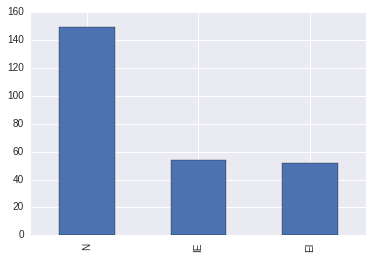

In [87]:
# Your code goes here
valueCountOfTarget = yTest.value_counts()
print valueCountOfTarget
yTest.value_counts().plot(kind='bar')

### ========== Question 2.8 ==========
What would be the accuracy of the classifier, if all points were labelled as `N`?

In [60]:
#yTrain == allN

In [61]:
#allN = pd.Series(np.repeat('N', len(Xtrain)) )
allN = yTrain.copy()
allN[allN!='N'] = 'N'
allN.shape

(2935,)

In [62]:
# Your code goes here
dummyClassifier = KNeighborsClassifier(n_neighbors=1)
dummyClassifier.fit(XtrainEnc, allN)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [63]:
dummyClassifier.score(XtrainEnc, allN)

1.0

In [64]:
dummyClassifier.score(XtestEnc, np.repeat('N', len(XtestEnc)))

1.0

As expected the dummy classifier because all classes are N then there is no way to have it wrong since we are always going to classify it as N no matter if we choose k=1 or larger. Finally the majority vote of all nodes that have the class as N will still be N

### ========== Question 2.9 ==========
Now we want to explore the effect of the `k` parameter. To do this, train the classifier multiple times, each time setting the KNN option to a different value. Try `5`, `10`, `50`, `100`, `200`, `500`, `1000`, `1500` and `2000` and test the classifier on the test set. How does the k parameter effect the results? *Hint: Consider how well the classifier is generalising to previously unseen data, and how it compares to the base rate again.*

In [65]:
# Your code goes here
ks = [5, 10, 50, 100, 200, 500, 1000, 1500, 2000]

In [66]:
def trainAndScoreKnnClassifier(k, trainData, trainTargets, testData, testTargets):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(trainData, trainTargets)
    #print "knn classifier with k: " + str(k)
    #print "training score:"
    trainingScore = classifier.score(trainData, trainTargets)
    #print trainingScore
    #print "testing score:"
    testingScore = classifier.score(testData, testTargets)
    #print testingScore
    return k, trainingScore, testingScore

In [67]:
scoreDict = dict()
for k in ks:
    curK, curTrainingScore, curTestingScore = trainAndScoreKnnClassifier(k, XtrainEnc, yTrain, XtestEnc, yTest)
    scoreDict[k] = {
        "trainingScore": curTrainingScore,
        "testingScore": curTestingScore
    }

In [68]:
scoreDict

{5: {'testingScore': 0.65098039215686276,
  'trainingScore': 0.77137989778534921},
 10: {'testingScore': 0.65490196078431373,
  'trainingScore': 0.73287904599659282},
 50: {'testingScore': 0.65490196078431373,
  'trainingScore': 0.70732538330494032},
 100: {'testingScore': 0.66666666666666663,
  'trainingScore': 0.69471890971039185},
 200: {'testingScore': 0.68235294117647061,
  'trainingScore': 0.68858603066439528},
 500: {'testingScore': 0.68627450980392157,
  'trainingScore': 0.69710391822827944},
 1000: {'testingScore': 0.63137254901960782,
  'trainingScore': 0.64906303236797269},
 1500: {'testingScore': 0.58431372549019611,
  'trainingScore': 0.51516183986371378},
 2000: {'testingScore': 0.58431372549019611,
  'trainingScore': 0.51311754684838162}}

We notice that as the k increases the training score is decreasing, which is expected because the best prediction to be made for the training instances is the one nearest neighbor.

But more importantly we care for testing, unseen, data. We see that the testing score climbs up and then starts falling again with a maximum at k=500 even though the k=200 is much more computationally preferable and the classification accuracy is not bad.

### ========== Question 2.10 ==========
Plot the results (k-value on the x-axis and classification accuracy on the y-axis), making sure to mark the axes. Can you conclude anything from observing the plot?

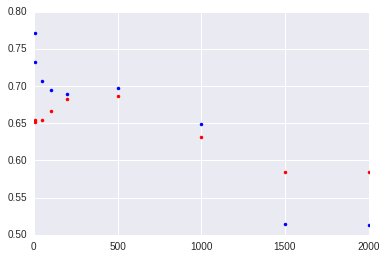

In [69]:
# Your code goes here
fig = plt.figure()
plt.hold(True)
plt.plot(scoreDict.keys(), [x['trainingScore'] for x in scoreDict.values()], 'b.')
plt.plot(scoreDict.keys(), [x['testingScore'] for x in scoreDict.values()], 'r.')
plt.hold(False)
plt.show()

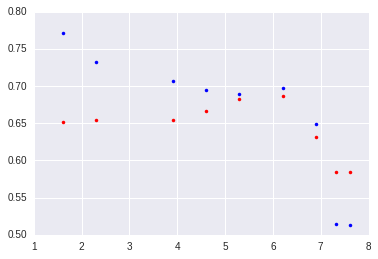

In [70]:
# plotting again here with log x axis to show the differences at the first small k values
fig = plt.figure()
plt.hold(True)
plt.plot(np.log(scoreDict.keys()), [x['trainingScore'] for x in scoreDict.values()], 'b.')
plt.plot(np.log(scoreDict.keys()), [x['testingScore'] for x in scoreDict.values()], 'r.')
plt.hold(False)
plt.show()

*Your answer goes here*

We notice that the training accuracy is continuously falling as the knn gets bigger while the testing accuracy rises a little bit and then falls, it has a maximum value

### ========== Question 2.11 ==========
Select best value for `k` from Questions 2.9 and 2.10 and plot the normalised confusion matrix on the test set. Then plot the confusion matrix for a 5-nearest neighbor classifier. What do you observe?

In [71]:
testingScores = [x['testingScore'] for x in scoreDict.values()]

In [72]:
bestK = scoreDict.keys()[np.argmax(testingScores)]
bestK

500

In [73]:
def whatClassesAreResponsibleForEachClassification(confusionMatrix):
    return confusionMatrix / np.sum(confusionMatrix, axis=0)

In [74]:
def howEachClassHasBeenClassified(confusionMatrix):
    return (confusionMatrix.T / np.sum(confusionMatrix, axis=1)).T

In [75]:
# Your code goes here
def getKnnPredictions(k, trainData, trainTargets, testData):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(trainData, trainTargets)
    return classifier.predict(testData)

In [76]:
def getInvertedNormalizedConfusionMatrix(realTargets, predictions):
    return whatClassesAreResponsibleForEachClassification(
        confusion_matrix(y_true=realTargets, y_pred=predictions)
    )

In [77]:
def getNormalizedConfusionMatrix(realTargets, predictions):
    return howEachClassHasBeenClassified(
        confusion_matrix(y_true=realTargets, y_pred=predictions)
    )

In [78]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [79]:
availableClasses = np.unique(yTest)

### confusion matrices with what classes are responsible for each classification

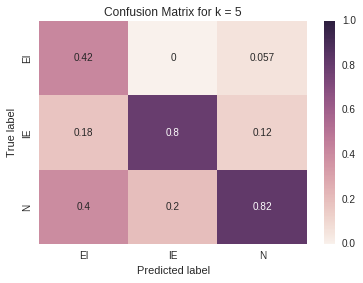

In [82]:
k = 5

plot_confusion_matrix(getInvertedNormalizedConfusionMatrix(
        realTargets=yTest,
        predictions=getKnnPredictions(k = k, trainData=XtrainEnc, trainTargets=yTrain, testData=XtestEnc)),
    classes = availableClasses, title='Confusion Matrix for k = %d' % k)

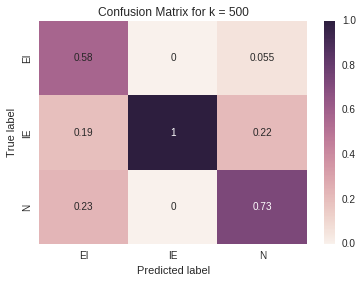

In [83]:
k = bestK

plot_confusion_matrix(getInvertedNormalizedConfusionMatrix(
        realTargets=yTest,
        predictions=getKnnPredictions(k = k, trainData=XtrainEnc, trainTargets=yTrain, testData=XtestEnc)),
    classes = availableClasses, title='Confusion Matrix for k = %d' % k)

### confusion matrices with how each class has been classified

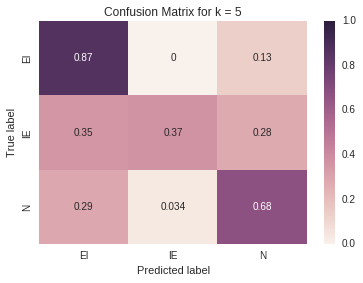

In [80]:
k = 5

predictions = getKnnPredictions(k = k, trainData=XtrainEnc, trainTargets=yTrain, testData=XtestEnc)

confMatrixNorm = getNormalizedConfusionMatrix(realTargets=yTest, predictions=predictions)

plot_confusion_matrix(confMatrixNorm, classes = availableClasses, title='Confusion Matrix for k = %d' % k)

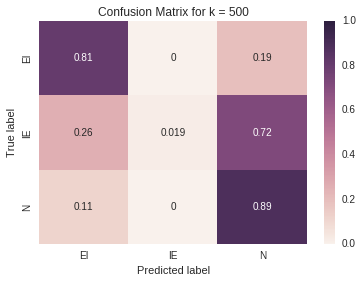

In [81]:
k = bestK

predictions = getKnnPredictions(k = k, trainData=XtrainEnc, trainTargets=yTrain, testData=XtestEnc)

confMatrixNorm = getNormalizedConfusionMatrix(realTargets=yTest, predictions=predictions)

plot_confusion_matrix(confMatrixNorm, classes = availableClasses, title='Confusion Matrix for k = %d' % k)

*Your answer goes here*

We notice that for the EI (exon -> intron) boundary the classifications are similar for k = 500 and k = 5.  
Actually is a little bit better for the k=5 case

We notice that for the N (neither, no boundary) is classified with better accuracy when k=500.

For the IE (intron -> exon) boundary the classifications are bad for the k=5 but even worse for k=500 because most are considered as N.

So if we are trying to predict the EI (exon -> intron) boundary then it makes little difference if we use k=5 or k=500

NOTE: Here the problem is imbalanced as we see from the histogram plotted above. The class N has large prior. We have 3 times more N instances than we do EI and IE instances. This means that as the k grows bigger the N will tend to be the majority of the instances and we are more likely to predict an instance to be of class N.

### ========== Question 2.12 ==========
Read about the [logarithimic loss](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html) (or cross-entropy loss) metric which is often used in neural networks. 

This metric takes as input the true labels and the estimated probability distributions (bernouli or multinomial). It makes sense to use this metric when we are interested not only in the predicted labels, but also in the confidence (i.e. probability) that these are predicted.

For instance, think of the situation where you have a single test point and two classifiers. Both classifiers predict the label correctly, however classifier A predicts that the test point belongs to the class with probability 0.55, whereas classifier B predicts the correct class with probability 0.99. Classification accuracy would be the same for the two classifiers (why?) but the `log_loss`  metric would indicate that classifier B should be favoured.

Produce a scatter plot similar to the one in Question 2.10 but this time show `log_loss` on your y axis. Which value for `k` would you pick if `log_loss` was your metric of interest?

In [94]:
def trainAndLogLossKnnClassifier(k, trainData, trainTargets, testData, testTargets):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(trainData, trainTargets)
    #print "knn classifier with k: " + str(k)
    #print "training score:"
    trainingLogLoss = log_loss(y_true = trainTargets, y_pred = classifier.predict_proba(trainData))
    #print trainingScore
    #print "testing score:"
    testingLogLoss = log_loss(y_true = testTargets, y_pred = classifier.predict_proba(testData))
    #print testingScore
    return k, trainingLogLoss, testingLogLoss

In [95]:
logLossDict = dict()

for k in ks:
    curK, curTrainingLogLoss, curTestingLogLoss = trainAndLogLossKnnClassifier(
        k, XtrainEnc, yTrain, XtestEnc, yTest
    )
    
    logLossDict[k] = {
        "trainingLogLoss": curTrainingLogLoss,
        "testingLogLoss": curTestingLogLoss
    }
    
logLossDict

{5: {'testingLogLoss': 2.9420876263947426,
  'trainingLogLoss': 0.46139261056778769},
 10: {'testingLogLoss': 1.5850056775927348,
  'trainingLogLoss': 0.58626552504300433},
 50: {'testingLogLoss': 0.79651473601615508,
  'trainingLogLoss': 0.74135413240889769},
 100: {'testingLogLoss': 0.80941650586968139,
  'trainingLogLoss': 0.7830735993049911},
 200: {'testingLogLoss': 0.83742752522707675,
  'trainingLogLoss': 0.81606631347505465},
 500: {'testingLogLoss': 0.87284045582334613,
  'trainingLogLoss': 0.86702569210111258},
 1000: {'testingLogLoss': 0.90756715766812968,
  'trainingLogLoss': 0.91277086439915101},
 1500: {'testingLogLoss': 0.93144772324348535,
  'trainingLogLoss': 0.94711292237164957},
 2000: {'testingLogLoss': 0.94734313948690085,
  'trainingLogLoss': 0.97636354980907014}}

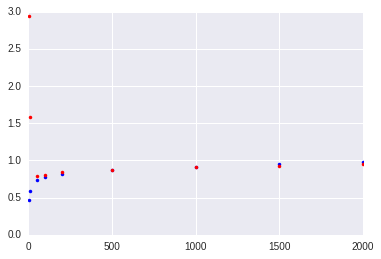

In [103]:
# Your code goes here
fig = plt.figure()
plt.hold(True)
plt.plot(logLossDict.keys(), [x['trainingLogLoss'] for x in logLossDict.values()], 'b.')
plt.plot(logLossDict.keys(), [x['testingLogLoss'] for x in logLossDict.values()], 'r.')
plt.hold(False)
plt.show()

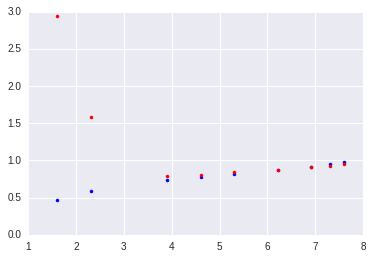

In [104]:
# Your code goes here
fig = plt.figure()
plt.hold(True)
plt.plot(np.log(logLossDict.keys()), [x['trainingLogLoss'] for x in logLossDict.values()], 'b.')
plt.plot(np.log(logLossDict.keys()), [x['testingLogLoss'] for x in logLossDict.values()], 'r.')
plt.hold(False)
plt.show()

*Your answer goes here*


The classification accuracy is the same for both classifiers because both would classify the one test point as correct and therefore both would have 1/1 = 100% classification accuracy.

Yes indeed the classifier with probability 0.99 is better than the classifier with probability 0.55 because the classifier must be more sure that this one test point is the correct one (since it is classifying it  correctly)

From the plots above we notice that for training and testing data as k is small the certainty of the classifier for the testing data is quite low in comparison with the training data. While the k is getting larger the certainty (log loss) is the same for classifying training data or testing data.

Now is interesting to notice that for k=50 the classifier has the minimum log loss (or the maximum certainty).

In our case because the K=200 and k=500 have similar accuracy but the k=200 has lower log-loss probability we would prefer the kNN classifier with k=200

### ========== Question 2.13 ==========

Could you use the `log_loss` metric to evaluate the performance of an SVM classifier? Explain.

*Your answer goes here*

The kNearestNeighbors Classifier is a generative model, you can assign probabilities according to the neighbors.

While the SVM classifier is a discriminative model which only describes the boundary between the two classes. We cannot have probabilities for it

In [105]:
#LinearSVC().fit(trainingData, trainingTargets).predict_proba(testingData) #predict_proba does not exist